In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
po=pd.read_csv('/content/Salaries.csv')

In [ ]:
po.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
po.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
po.shape

(148654, 13)

In [ ]:
(po.isna().sum()/po.shape[0] )*100

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64

In [ ]:
po.drop(columns=['Notes','Status'],inplace=True)


In [ ]:
po.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [ ]:
#fill BasePay NaN
avg=round(po.BasePay.mean(),2)
print('average BasePay is',avg)
po.BasePay= po.BasePay.fillna(avg)

average BasePay is 66325.45


In [ ]:
po.BasePay.isna().sum()

0

In [ ]:
po.BasePay.mean()

66325.44884523794

In [ ]:
 # What is the highest amount of OvertimePay in the dataset ?
 high=po.OvertimePay.max()
 print('high Overtime amount is :',high)

high Overtime amount is : 245131.88


In [ ]:
#fetch record of Highest paid employee
hp=po.TotalPayBenefits.max()
hp

567595.43

In [ ]:
po[po.TotalPayBenefits==hp]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


In [ ]:
# Hw to get top 5 highest paid employee
hp=po.sort_values(by='TotalPayBenefits',ascending= False)
hp.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco


In [ ]:
po.TotalPayBenefits.nlargest(5)

0         567595.43
1         538909.28
110531    510732.68
110532    479652.21
110533    436224.36
Name: TotalPayBenefits, dtype: float64

In [ ]:
#Fetch name of highest Overtime pay employee
ov=po.OvertimePay.max()
ov

245131.88

In [ ]:
po.query('OvertimePay==245131.88').EmployeeName

1    GARY JIMENEZ
Name: EmployeeName, dtype: object

# Average TotalPay of all Employees per year

In [ ]:
po.groupby('Year').TotalPay.mean()

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

# What is the job title of JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [ ]:
from pandas.core.groupby.groupby import get_groupby
x=po.groupby('EmployeeName').get_group('JOSEPH DRISCOLL')
x.JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

# How much does JOSEPH DRISCOLL make (including benefits)?

In [ ]:
x.TotalPayBenefits

24    270324.91
Name: TotalPayBenefits, dtype: float64

# What is the name, Job title of highest paid person (including benefits)?

In [ ]:
xp=po.TotalPayBenefits.max()
xp

567595.43

In [ ]:
po.query('TotalPayBenefits==567595.43').JobTitle

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

# What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [ ]:
hpp=po.sort_values(by='TotalPayBenefits',ascending= True)
hpp.head(1)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco


In [ ]:
po.TotalPayBenefits.nsmallest(1)

148653   -618.13
Name: TotalPayBenefits, dtype: float64

# Show me the records with totalpaybenefit less than or equal to 0

In [ ]:
po.query('TotalPayBenefits<=0')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.00,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.00,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.00,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,66325.45,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,66325.45,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,66325.45,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148626,148627,Paulet Gaines,Account Clerk,0.00,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.00,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148628,148629,Mark W Mcclure,General Laborer,0.00,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.00,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


## What was the average (mean) BasePay of all employees per year? (2011-2014) ?

In [ ]:
po.groupby('Year').BasePay.mean()

Year
2011    63595.956517
2012    65436.406857
2013    69576.866598
2014    66564.396851
Name: BasePay, dtype: float64

# How many unique job titles are there?

In [ ]:
c=po.JobTitle.unique()
c
c.shape

(2159,)

# What are the top 5 most common jobs?

In [ ]:
po['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

# How many are there those work as a POLICE OFFICER III

In [ ]:
def Police(title):
    if 'Police Officer 3' in title :
        return True
    else:
        return False
sum(po['JobTitle'].apply(lambda x: Police(x)))

2421

# In which department we have least employees?

In [ ]:
po['JobTitle'].value_counts().tail(20)

MEDIA/SECURITY SYSTEMS SUPERVISOR                 1
CHIEF MICROBIOLOGIST                              1
COMMUNICATIONS DIRECTOR                           1
SENIOR DATA ENTRY OPERATOR                        1
PIANIST                                           1
LIBRARIAN II - ASIAN ARTS                         1
ASSISTANT INDUSTRIAL HYGIENIST                    1
EMPLOYEE ASSISTANCE COUNSELOR                     1
POWER GENERATION TECHNICIAN I                     1
TRAF SIGNAL ELECTRICIAN SUP I                     1
METAL FABRICATOR                                  1
ASSISTANT DIRECTOR, JUVENILE HALL                 1
CONFIDENTIAL SECRETARY CITY ATTORNEY              1
TRAF SIGNAL ELECTRICIAN SUP II                    1
DIRECTOR, JUVENILE HALL                           1
CHIEF HOUSING INSPECTOR                           1
TRAFFIC SIGNAL OPERATOR                           1
COURT COMPUTER FACILITIES COORDINATOR             1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I    1
VICTIM & WIT


## Fetch record of year 2011 where Basepay 200000

In [ ]:
l=po.query('Year==2011'and'BasePay>=200000')
l


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,San Francisco
12,13,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02,0.00,0.00,NaN,294580.02,294580.02,2011,San Francisco
13,14,JOHN MARTIN,DEPARTMENT HEAD V,271329.03,0.00,21342.59,NaN,292671.62,292671.62,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
110953,110954,Ronald P Flynn,Assistant Chief Attorney 1,201296.01,0.00,1250.00,57125.63,202546.01,259671.64,2014,San Francisco
110954,110955,Sheryl L Bregman,Assistant Chief Attorney 1,201296.00,0.00,1250.00,57125.62,202546.00,259671.62,2014,San Francisco
110976,110977,Susan T Obata,Supervising Physician Spec,202445.22,0.00,0.00,55649.14,202445.22,258094.36,2014,San Francisco
110977,110978,John O Funghi,Engineer/Architect Principal,201181.01,0.00,0.00,56841.85,201181.01,258022.86,2014,San Francisco


# How much average basepay is given to employees inthe year 2013

In [ ]:
po.query('Year==2013').BasePay.mean()

69576.86659814924

# Plot.the % distribustion of Yearwise TotalPay

In [60]:
l=(po.groupby('Year').TotalPay.mean())
l


Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

<Axes: ylabel='TotalPay'>

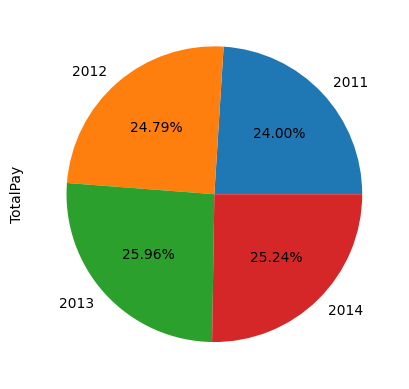

In [66]:
po.groupby('Year').TotalPay.mean().plot(kind='pie',autopct='%.2f%%')

# How many employees getting 0 overtimePay?

In [ ]:
po.query('OvertimePay==0').EmployeeName.count()

77321